In [21]:
import cv2
import numpy as np
import math
from math import hypot,sqrt
import base64
from PIL import Image
import io
from matplotlib import pyplot as plt
import time
from os.path import join
%matplotlib inline

In [22]:
def save(img):
    cv2.imwrite(str(time.time())+'.jpg', img)
def showc(img):
    plt.imshow(cv2.cvtColor(imgN, cv2.COLOR_BGR2RGB))
def showg(img):
    plt.imshow(img)

In [101]:
filename = '1.jpg'
imgN = cv2.imread(filename,0)
imgN

array([[185, 182, 188, ..., 134, 134, 134],
       [183, 180, 184, ..., 135, 136, 136],
       [184, 181, 180, ..., 134, 135, 135],
       ...,
       [116, 138, 133, ..., 159, 129, 128],
       [ 82, 127, 127, ..., 140, 131, 131],
       [100, 121, 113, ..., 118, 120, 121]], dtype=uint8)

In [102]:
med_val = np.median(imgN)
lower = int(max(0,0.6*med_val))
upper = int(min(255,1.3*med_val))

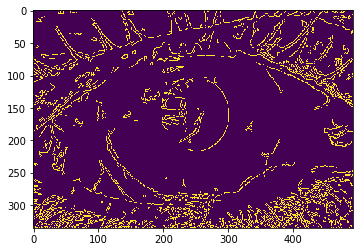

In [104]:
# img = imgN
img = cv2.blur(imgN, ksize=(1,1))
img = cv2.Canny(image = img, threshold1=lower, threshold2=upper)
plt.imshow(img)

In [93]:
# if imgN.dtype!='uint8':
#     imgN = np.array(imgN, dtype=np.uint8) 

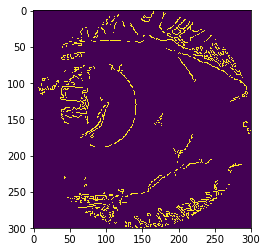

In [109]:
# img = cv2.cvtColor(imgN, cv2.COLOR_BGR2GRAY)
# img = cv2.medianBlur(img,3)

In [110]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,param1=50,param2=50,minRadius=30,maxRadius=0)
circles = np.uint16(np.around(circles))

x, y, r = circles[0,:][0]   # Coordinates and Radius of the Iris which can be used for detecting Glaucoma
rows, cols = img.shape

print (x,y,r)

xr=x
yr=y

AttributeError: 'NoneType' object has no attribute 'rint'

In [74]:
# # Brightness ++++ #h = hue, s = ?
# hsv = cv2.cvtColor(imgN, cv2.COLOR_BGR2HSV)
# h,s,v = cv2.split(hsv)
# v += 250 # value = intensity
# final_hsv = cv2.merge((h,s,v))

# imgR = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
# img = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

In [106]:
# Crop And Shift Origin
img = img[ y-r : y+r , x-r : x+r]
y = r
x = r

rows, cols = img.shape
save(img)

In [107]:
# Removing Whitespace
for i in range(cols):
    for j in range(rows):
        if hypot(i-x, j-y) > r: #hypot = euclidian distance
            img[j,i] = 0
save(img)


# img=img[30:2*r-30,30:2*r-30] #reduce every side by 30
# y=r-30
# x=r-30

In [23]:
#img2 = cv2.threshold(img2 , 15 , 125, cv2.THRESH_BINARY)
circles1 = cv2.HoughCircles(img ,cv2.HOUGH_GRADIENT,1,120,param1=50,param2=50,minRadius=0,maxRadius=0) #pupil detect
circles1 = np.uint16(np.around(circles1))
#circles2 = cv2.HoughCircles(img2 ,cv2.HOUGH_GRADIENT,1,120,param1=50,param2=50,minRadius=1,maxRadius=0)
#circles2 = np.uint16(np.around(circles2))

x2, y2, r2 = circles1[0,:][0]


rows2, cols2,__ = img.shape

xn=x2+30+xr-r
yn=y2+30+yr-r

# print x2,y2,r2

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
npixels=0
intensitySum=0
bgrList=[]
for i in range(cols2):
    for j in range(rows2):
        if hypot(i-xn, j-yn) < r2:
            npixels+=1
            b=imgR[j,i][0]
            g=imgR[j,i][1]
            r=imgR[j,i][2]
            #calculate intensity
            intensitySum+=b
            intensitySum+=g
            intensitySum+=r
            # #calculate unformity

            #caculate deviation
            bgrList.append(b)
            bgrList.append(g)
            bgrList.append(r)

intensity = (intensitySum*1.0)/(3.0*npixels)

In [ ]:
devSum=0
for f in bgrList:
    devSum+=(f-intensity)*(f-intensity)
devSum=sqrt(devSum)
devSum=devSum*1.0/(81*sqrt(((2*r2)*(2*r2))-1))

print(str(devSum)+"&"+str(intensity))

In [211]:
filename = '4.png'

In [212]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

imgO = cv2.imread(filename)
# Brightness ++
hsv = cv2.cvtColor(imgO, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
v *= 2
s *= 2
final_hsv = cv2.merge((h,s,v))
imgR = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
img = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

cv2.imwrite('temp.png', img)
image = cv2.imread('temp.png')

# Brightness ++
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
v += 250
final_hsv = cv2.merge((h,s,v))
img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
save(img)

# cv2.imshow("image", image)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
retval, thresholded = cv2.threshold(gray, 50, 255, 0)

save(thresholded)
# cv2.imshow("threshold", thresholded)

closed = cv2.erode(cv2.dilate(thresholded, kernel, iterations=1), kernel, iterations=1)
#closed = cv2.morphologyEx(close, cv2.MORPH_CLOSE, kernel)

# save(closed)
# cv2.imshow("closed", closed)

thresholded, contours, hierarchy = cv2.findContours(closed, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

drawing = np.copy(image)
cv2.drawContours(drawing, contours, -1, (255, 0, 0), 2)

for contour in contours:        
    area = cv2.contourArea(contour)
    if area < 1000:
        continue
    contour = cv2.convexHull(contour)
    circumference = cv2.arcLength(contour,True)
    circularity = circumference ** 2 / (4*math.pi*area)
    if circularity>1.3:
#         print(circularity)
        continue
    bounding_box = cv2.boundingRect(contour)

    extend = area / (bounding_box[2] * bounding_box[3])

    # reject the contours with big extend
    if extend > 0.8:
        continue

    # calculate countour center and draw a dot there
    m = cv2.moments(contour)
    if m['m00'] != 0:
        center = (int(m['m10'] / m['m00']), int(m['m01'] / m['m00']))
        cv2.circle(drawing, center, 3, (0, 255, 0), -1)

    # fit an ellipse around the contour and draw it into the image
    try:
        ellipse = cv2.fitEllipse(contour)
        cv2.ellipse(drawing, box=ellipse, color=(0, 255, 0))
    except:
        pass
    
save(drawing)
# show the frame
# cv2.imshow("Drawing", drawing)

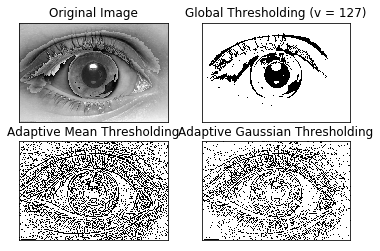

In [171]:
img = cv2.imread(filename,0)
img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,70,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

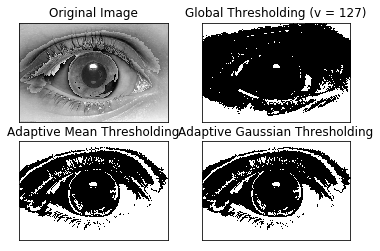

In [172]:
# img = cv2.imread(filename,0)
# img = cv2.medianBlur(img,5)
# # global thresholding
# ret1,th1 = cv2.threshold(img,170,255,cv2.THRESH_BINARY)
# # Otsu's thresholding
# ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# # Otsu's thresholding after Gaussian filtering
# blur = cv2.GaussianBlur(img,(5,5),0)
# ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# images = [img, th1, th2, th3]
# for i in range(4):
#     plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()

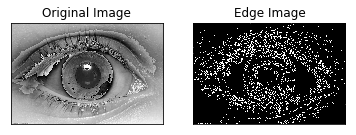

In [156]:
# img = cv2.imread(filename,0)
# edges = cv2.Canny(img,50,100)

# plt.subplot(121),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# plt.show()

In [ ]:
# imgG = cv2.imread(filename,0)
# imgO = cv2.imread(filename)

# thV,thI = cv2.threshold(imgG,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# highTH = thV
# lowTH = thV / 2

# # Find the binary image with edges from the thresholded image
# imgE = cv2.Canny(imgG, threshold1=lowTH, threshold2=highTH)
# cv2.imwrite('eyeCanny.png', imgE)

# # Process the image for circles using the Hough transform
# circles = cv2.HoughCircles(imgE,cv2.HOUGH_GRADIENT, 2, 30, param1=30, param2=150, minRadius=0, maxRadius=150)

# # Determine if any circles were found
# if circles is None:
#     print ("No circles found")
# else:
#     # convert the (x, y) coordinates and radius of the 
#     # circles to integers
#     circles = np.round(circles[0, :]).astype("int")

#     # draw the circles
#     for (x, y, r) in circles:
#         cv2.circle(imgO, (x, y), r, (255, 2550, 0), 1)

#     cv2.imwrite("houghOutput.png", imgO)

In [26]:
# import statistics
# img = cv2.imread(filename,0)
# a = cv2.meanStdDev(img)[0][0][0]
# s = cv2.meanStdDev(img)[1][0][0]
# a,s

(162.66910970052083, 64.73813307908593)

In [28]:
# k = 0.25
# r = 0.5
# p = 2
# q = 10

In [32]:
# t = a * (1 + p * math.exp(-q * a) + k * ((s / r) - 1))
# t

5387.449068099763

In [191]:
# #All the stuff here is for finding pupils in eyes

# #Mask an image so all pixels outside feature circle are black
# def mask_image_by_feature(image, feature):
#     circle_mask_image = np.zeros(image.shape, dtype=np.uint8)
#     cv2.circle(circle_mask_image, (int(feature.pt[0]), int(feature.pt[1])), int(feature.size/2), 1, -1)
#     masked_image = (image * circle_mask_image).astype(np.uint8)
#     return masked_image

# #Find average brightness of pixels under a feature's circle
# def find_average_brightness_of_feature(image, feature):
#     feature_image = mask_image_by_feature(image, feature)
#     total_value = feature_image.sum()
#     area = np.pi * ((feature.size/2)**2)
#     return total_value/area

# #Sums up all the pixels under a feature's circle and averages them
# #Darkest first
# def sort_features_by_brightness(image, features):
#     features_and_brightnesses = [(find_average_brightness_of_feature(image, feature), feature) for feature in features]
#     features_and_brightnesses.sort(key = lambda x:x[0])
#     return [fb[1] for fb in features_and_brightnesses]

# def draw_circle_for_feature(image, feature, color=255, thickness=1):
#     cv2.circle(image, (int(feature.pt[0]), int(feature.pt[1])), int(feature.size/2), color, thickness)

# def find_pupil(gray_image, minsize=.1, maxsize=.5):
#     detector = cv2.MSER_create()
#     features_all = detector.detect(gray_image)
#     features_big = [feature for feature in features_all if feature.size > gray_image.shape[0]*minsize]
#     features_small = [feature for feature in features_big if feature.size < gray_image.shape[0]*maxsize]
#     if len(features_small) == 0:
#         return None
#     features_sorted = sort_features_by_brightness(gray_image, features_small)
#     pupil = features_sorted[0]
#     return (int(pupil.pt[0]), int(pupil.pt[1]), int(pupil.size/2))

# def circle_pupil(color_image, output_image = None):
#     if output_image is None:
#         output_image = color_image
#     gray_image = cv2.cvtColor(color_image, cv2.COLOR_RGB2GRAY)
#     pupil_coords = find_pupil(gray_image)
#     if pupil_coords is not None:
#         cv2.circle(output_image, pupil_coords[:2], pupil_coords[2], (0,255,0),4)

# def draw(photo):
#     image_to_show = photo.copy()
#     circle_pupil(image_to_show)
#     save(image_to_show)
# #     if cv2.waitKey(10) > 0: #If we got a key press in less than 10ms
# #         return 1
# #     return 0

# draw(cv2.imread(filename))


In [215]:
# Brightness ++++ #h = hue, s = ?
imgQ = cv2.imread(filename)
hsv = cv2.cvtColor(imgQ, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)
# v *= 2 # value = intensity
s *= 2
final_hsv = cv2.merge((h,s,v))
imgR = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
img = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)
save(img)

In [13]:
gray = cv2.cvtColor(imgN, cv2.COLOR_BGR2GRAY)
# class CascadeClassifier:
#     """
#     This classifier is trained by default in OpenCV
#     """
#     def __init__(self, glasses=True):
#         if glasses:
#             self.eye_cascade = cv2.CascadeClassifier(join('haar', 'haarcascade_eye_tree_eyeglasses.xml'))
#         else:
eye_cascade = cv2.CascadeClassifier(join('haar', 'haarcascade_eye.xml'))

eyes = eye_cascade.detectMultiScale(gray, 1.3, 5)  # if not empty - eyes detected


error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/objdetect/src/cascadedetect.cpp:1698: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [ ]:
irises = []

for (ex, ey, ew, eh) in eyes:
    iris_w = int(ex + float(ew / 2))
    iris_h = int(ey + float(eh / 2))
    irises.append([numpy.float32(iris_w), numpy.float32(iris_h)])

irises

In [14]:
save(gray)

In [13]:
# Numpy is needed because OpenCV images in python are actually numpy arrays.
import numpy
import cv2

class iris_detection():
    def __init__(self, image_path):
        '''
        initialize the class and set the class attributes
        '''
        self._img = None
        self._img_path = image_path
        self._pupil = None

    def load_image(self):
        '''
        load the image based on the path passed to the class
        it should use the method cv2.imread to load the image
        it should also detect if the file exists
        '''
        self._img = cv2.imread(self._img_path)
        # If the image doesn't exists or is not valid then imread returns None
#         if self._img == None:
#             return False
#         else:
        return True
        
    def convert_to_gray_scale(self):
        self._img = cv2.cvtColor(self._img, cv2.COLOR_BGR2GRAY)

    def detect_pupil(self):
        '''
        This method should use cv2.findContours and cv2.HoughCircles() function from cv2 library to find the pupil
        and then set the coordinates for pupil circle coordinates
        '''
        # First binarize the image so that findContours can work correctly.
        _, thresh = cv2.threshold(self._img, 100, 255, cv2.THRESH_BINARY)
        # Now find the contours and then find the pupil in the contours.
        contours, _, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        c = cv2.HoughCircles(contours, cv2.HOUGH_GRADIENT, 2, self._img.shape[0]/2)
        # Then mask the pupil from the image and store it's coordinates.
        for l in c:
            # OpenCV returns the circles as a list of lists of circles
            for circle in l:
                center = (circle[0], circle[1])
                radius = circle[2]
                cv2.circle(self._img, center, radius, (0, 0, 0), thickness = -1)
                self._pupil = (center[0], center[1], radius)
        
    def detect_iris(self):
        '''
        This method should use the background subtraction technique to isolate the iris from the original image
        It should use the coordinates from the detect_pupil to get a larger circle using cv2.HoughCircles()
        '''
        _, t = cv2.threshold(self._img, 195, 255, cv2.THRESH_BINARY)
        contours, _, _ = cv2.findContours(t, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # Find the iris using the radius of the pupil as input.
        c = cv2.HoughCircles(contours, cv2.HOUGH_GRADIENT, 2, self._pupil[2] * 2, param2 = 150)

        for l in c:
            for circle in l:
                center = (self._pupil[0], self._pupil[1])
                radius = circle[2]
                # This creates a black image and draws an iris-sized white circle in it.
                mask = numpy.zeros((self._img.shape[0], self._img.shape[1], 1), numpy.uint8)
                cv2.circle(mask, center, radius, (255, 255, 255), thickness = -1)
                # Mask the iris and crop everything outside of its radius.
                self._img = cv2.bitwise_and(self._img, mask)

    def start_detection(self):
        '''
        This is the main method that will be called to detect the iris
        it will call all the previous methods in the following order:
        load_image
        convert_to_gray_scale
        detect_pupil
        detect_iris
        then it should display the resulting image with the iris only
        using the method cv2.imshow
        '''
        if(self.load_image()):
            self.convert_to_gray_scale()
            self.detect_pupil()
            self.detect_iris()
#             cv2.imshow("Result", self._img)
#             cv2.waitKey(0)
            cv2.imwrite(str(time.time())+'.jpg', self._img)
        else:
            print('Image file "' + self._img_path + '" could not be loaded.')
        
#id = iris_detection('c:\\temp\\eye_image.jpg')
id = iris_detection('4.jpg')
id.start_detection()

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'CvtHelper'


### 